In [37]:
from Coulomb import *
from plotting import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import time
matplotlib.__version__

'3.1.3'

In [2]:
import sys
print(sys.version)

3.7.2 (default, Dec 29 2018, 00:00:04) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [3]:
test = Coulomb(QE, QE, MI, MI, 200, 1E19, False, False, True)

In [5]:
help(test.strongConv)

Help on method strongConv in module Coulomb:

strongConv(E, npaths, numT, t_tot, integrator='EM', correctors=None, silent=False) method of Coulomb.Coulomb instance
    E:          Energy of beam (eV)
    npaths:     number of sample paths
    numT:       Number of times to divide t_tot by 4 (number of time steps)
    t_tot:      Duration of each simulation
    integrator: Method for integrating diffusion, 'EM' or 'MEM'
    correctors: Order of corrector for MEM



In [82]:
t, err_MEM = test.strongConv(17000, 128, 9, 0.001, integrator = 'MEM', correctors = 1, silent = True)
t, err_EM = test.strongConv(17000, 128, 9, 0.001, integrator = 'EM', silent = True)

order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fo

order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fo

order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fourier series adjusted to 10240.
order of Fo

In [19]:
err_MEM.shape

(128, 8, 3)

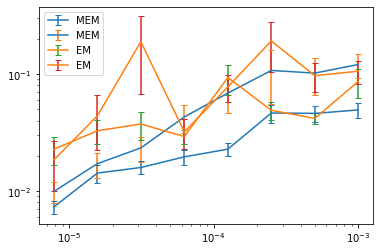

In [83]:
diff_MEM = np.abs(np.diff(err_MEM, axis = 1) / err_MEM[:, :-1, :])
diff_EM = np.abs(np.diff(err_EM, axis = 1) / err_EM[:, :-1, :])
# plt.plot(t, err_ave)
for err, lab, c in zip([diff_MEM, diff_EM], ['MEM', 'EM'], ['C0', 'C1']):
    err_ave = np.mean(err, axis = 0)
    err_err = stats.sem(err, axis = 0)
    for vcomp in [1, 2]:
        plt.errorbar(t[:-1], err_ave[:, vcomp], yerr = err_err[:, vcomp], capsize = 3, Color = c, label = lab)
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [66]:
test = Coulomb(QE, QE, MI, MI, 200, 1E19, False, False, True)
num = 8
tTot = 0.1

In [67]:
vcomp = 0

In [68]:
np.arange(num)

array([0, 1, 2, 3, 4, 5, 6, 7])

0.00078125
order of Fourier series adjusted to 5120.
0.0015625
0.003125
0.00625
0.0125
0.025
0.05
0.1


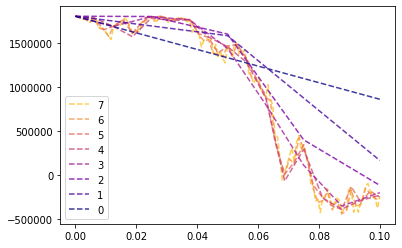

In [81]:
fig, ax = plt.subplots()
# timesteps = 2**np.array(range(num))
timesteps = np.array(range(num))
timesteps = timesteps / (np.max(timesteps)*1.15)
colors = pylab.cm.plasma(timesteps)

end = np.zeros(num)
lList = np.arange(num)
test.fixedWiener(tTot, seed = 8)
for l in np.flip(lList):
    dt = tTot / (2**l)
    print(dt)
    time, hist = test.beam_MEM(17000, 1, dt, tTot, 10**(num+1), 
                               1, True)
    ax.plot(time, hist[:, 0, vcomp], '--', 
            alpha = 0.8, color = colors[l], label = l)
    end[l] = hist[-1, 0, vcomp]
plt.legend()

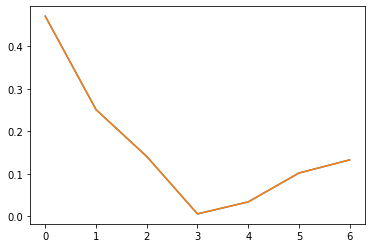

In [39]:
diff = end[1:] - end[:-1]
plt.plot(np.abs(diff)/end[:-1])
plt.plot(np.abs(np.diff(end))/end[:-1])

[ 0. 20. 40. 60. 80. 98.]


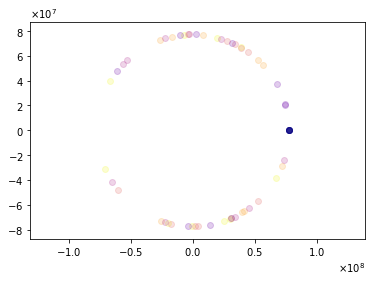

In [52]:
test = Coulomb(-1*QE, QE, ME, MI, 200, 1E19, False, False, True)
test.fixedWiener(tTot, seed = 8)
time, hist = test.beam_MEM(17000, 10, 0.001, 0.0985, 10**(num+1), 
                               True, False)
fig, ax = plt.subplots()
vSpaceSnaps(ax, hist, np.array([0, 0.02, 0.04, 0.06, 0.08, 0.098]), 0.0985)

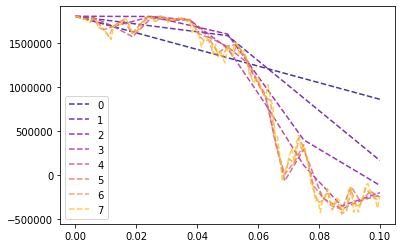

In [77]:
fig, ax = plt.subplots()
timesteps = np.array(range(num))
timesteps = timesteps / (np.max(timesteps)*1.15)
colors = pylab.cm.plasma(timesteps)


for l in range(num):
#     time, hist = test.beam_EM(17000, 10, tTot / (2**l), tTot, 10**(num+1), 
#                               True, True)
#     ax.plot(time, hist[:, 0, vcomp], '+--', 
#             alpha = 0.8, color = colors[l], label = l)
    
    time, hist = test.beam_MEM(17000, 1, tTot / (2**l), tTot, 10**(num+1), 
                              correctors = 1, fixedWiener = True)
    ax.plot(time, hist[:, 0, vcomp], '--', 
            alpha = 0.8, color = colors[l],label = l)
plt.legend()

[    0.  3326.  6653.  9980. 13307. 16301.]


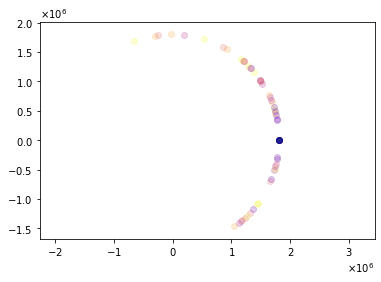

In [58]:
fig, ax = plt.subplots()
vSpaceSnaps(ax, hist, np.array([0, 0.02, 0.04, 0.06, 0.08, 0.098]), 0.0985)

In [10]:
test.wienerProcess(0.01, 4, True, 0.1)

array([[ 0.05823622, -0.04905877, -0.10933519],
       [ 0.04250836,  0.10541819, -0.09016786],
       [ 0.08959007,  0.13781782, -0.26043686],
       [-0.13088719, -0.00718729,  0.17810359],
       [-0.07519306,  0.02298329, -0.05189664],
       [ 0.01296826, -0.03426829, -0.09096584],
       [-0.05535269,  0.05288453,  0.0489954 ],
       [-0.11215844,  0.0551421 ,  0.10204832],
       [ 0.01523688,  0.07218067,  0.10892928],
       [ 0.01800154, -0.11813659, -0.08434531]])

In [11]:
test.wienerProcess(0.01, 4, False, 0.1)

array([[-0.04211741, -0.02722955, -0.15044821],
       [-0.08988705, -0.04535695, -0.09299446],
       [ 0.19114944,  0.00093135,  0.07140027],
       [ 0.0101037 , -0.05443649,  0.04718624]])

In [8]:
summ = np.sum(test.wiener[0 : 1000, :, :], axis = 0)

In [9]:
summ.shape

(10, 3)

In [3]:
moments = [1, 2, 3, 4]
dtList, momListEM = test.pitchConvergence(17000, 500, -3, -0.6, 1, 10, moments, 'EM', False, True)

In [35]:
moments = [1, 2, 3, 4]
dtListMEM, momListMEM = test.pitchConvergence(17000, 500, -3, 0, 1, 10, moments, 'MEM', False, True)

Text(0.5, 0, 'dt')

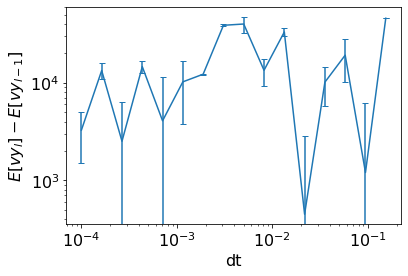

In [20]:
# aveMom = np.mean(momListEM, axis = 1)
# steMom = stats.sem(momListEM, axis = 1)

aveMom = np.abs(np.diff(np.mean(momListMEM, axis = 1), axis =0))
steMom = np.diff(stats.sem(momListMEM, axis = 1), axis = 0)

fig, ax = plt.subplots()
momIndex = 0
i = 1
ebar = ax.errorbar(dtList[1:], aveMom[:, momIndex, i], steMom[:, momIndex, i], 
                   capsize = 3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$E[vy_l] - E[vy_{l-1}]$')
plt.xlabel('dt')

(11,) (11, 10, 4, 3)
(11, 4, 3)


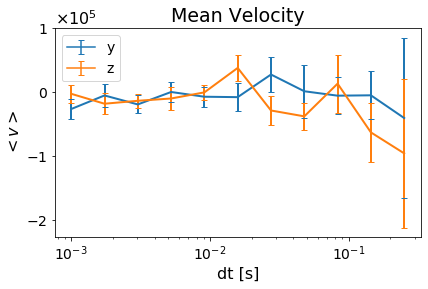

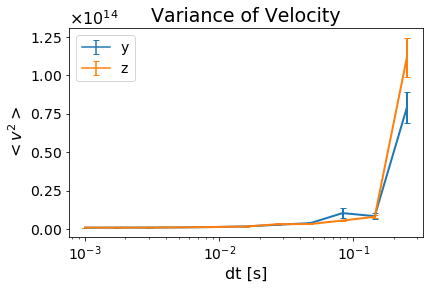

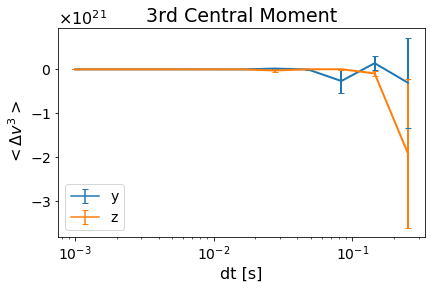

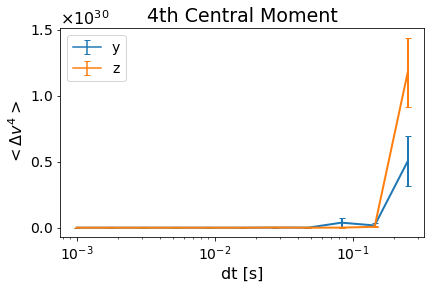

In [26]:
print(dtList.shape, momListEM.shape)
aveMom = np.mean(momListEM, axis = 1)
# steMom = np.std(momListEM, axis = 1)

steMom = stats.sem(momListEM, axis = 1)
print(aveMom.shape)
# print(dtList, aveMom)
# plt.plot(dtList, aveMom[:, 2, 0])


for momIndex, name in zip(moments, ['1st', '2nd', '3rd', '4th']):
    fig, ax = plt.subplots()
    lines = []
    momIndex = momIndex -1
    for i, lab in zip([1, 2], ['y', 'z']):
        ebar = ax.errorbar(dtList, aveMom[:, momIndex, i], steMom[:, momIndex, i], capsize = 3, label = lab)
        lines += ebar.lines
    plt.xscale('log')
#     plt.yscale('log')
    plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
    power =  str(moments[momIndex])
    if power == '1':
        ylabel = '$<v>$'
        title = 'Mean Velocity'
    elif power == '2':
        ylabel = '$<v^2>$'
        title = 'Variance of Velocity'
    else:
        ylabel = '$<\Delta v^{}>$'.format(power)
        title = name +' Central Moment'
    formatAndSave(fig, ax, lines, 'dt [s]', ylabel, fontsize = 16,
                  title = title,
#                  filename = name +'MomentEM.pdf',
                 )

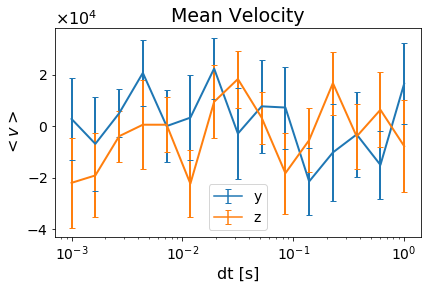

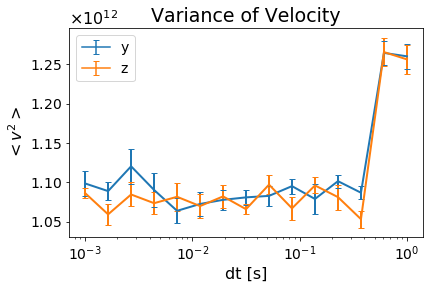

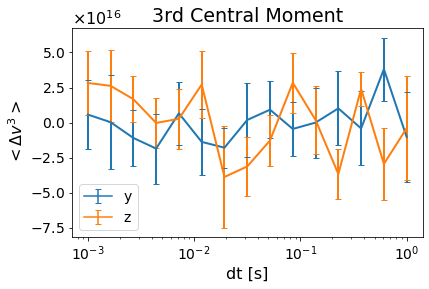

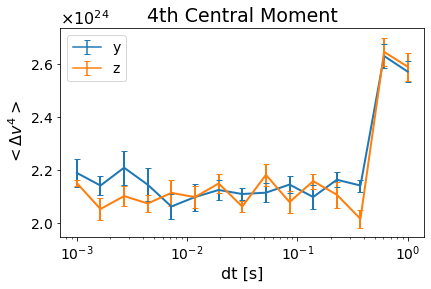

In [36]:
aveMom = np.mean(momListMEM, axis = 1)
steMom = stats.sem(momListMEM, axis = 1)

for momIndex, name in zip(moments, ['1st', '2nd', '3rd', '4th']):
    fig, ax = plt.subplots()
    lines = []
    momIndex = momIndex -1
    for i, lab in zip([1, 2], ['y', 'z']):
        ebar = ax.errorbar(dtListMEM, aveMom[:, momIndex, i], steMom[:, momIndex, i], capsize = 3, label = lab)
        lines += ebar.lines
    plt.xscale('log')
#     plt.yscale('log')
    plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
    power =  str(moments[momIndex])
    if power == '1':
        ylabel = '$<v>$'
        title = 'Mean Velocity'
    elif power == '2':
        ylabel = '$<v^2>$'
        title = 'Variance of Velocity'
    else:
        ylabel = '$<\Delta v^{}>$'.format(power)
        title = name +' Central Moment'
    formatAndSave(fig, ax, lines, 'dt [s]', ylabel, fontsize = 16,
                  title = title,
#                  filename = name +'MomentEM.pdf',
                 )

In [39]:
dtListMEM

array([1.        , 0.61054023, 0.37275937, 0.22758459, 0.13894955,
       0.08483429, 0.05179475, 0.03162278, 0.01930698, 0.01178769,
       0.00719686, 0.00439397, 0.0026827 , 0.00163789, 0.001     ])

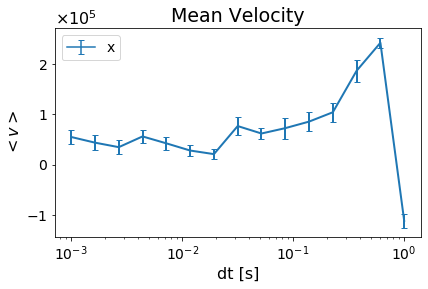

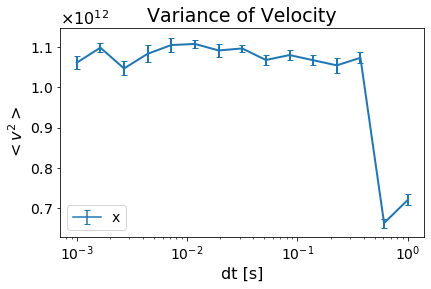

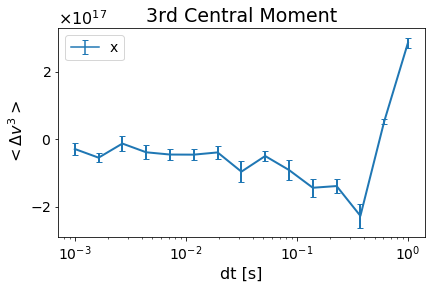

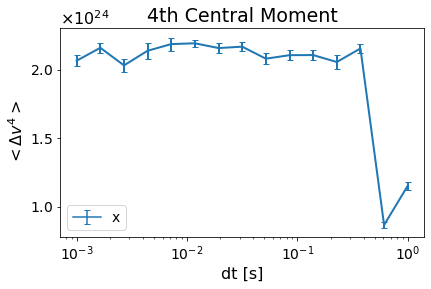

In [37]:
aveMom = np.mean(momListMEM, axis = 1)
steMom = stats.sem(momListMEM, axis = 1)

for momIndex, name in zip(moments, ['1st', '2nd', '3rd', '4th']):
    fig, ax = plt.subplots()
    lines = []
    momIndex = momIndex -1
    for i, lab in zip([0], ['x']):
        ebar = ax.errorbar(dtListMEM, aveMom[:, momIndex, i], steMom[:, momIndex, i], capsize = 3, label = lab)
        lines += ebar.lines
    plt.xscale('log')
#     plt.yscale('log')
    plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
    power =  str(moments[momIndex])
    if power == '1':
        ylabel = '$<v>$'
        title = 'Mean Velocity'
    elif power == '2':
        ylabel = '$<v^2>$'
        title = 'Variance of Velocity'
    else:
        ylabel = '$<\Delta v^{}>$'.format(power)
        title = name +' Central Moment'
    formatAndSave(fig, ax, lines, 'dt [s]', ylabel, fontsize = 16,
                  title = title,
#                  filename = name +'MomentEM.pdf',
                 )

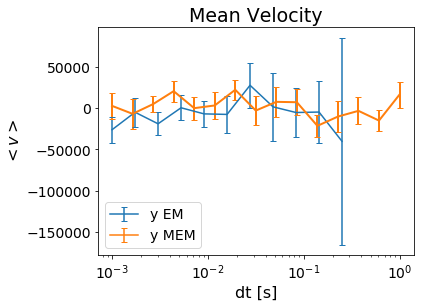

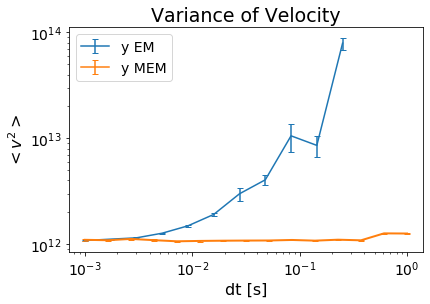

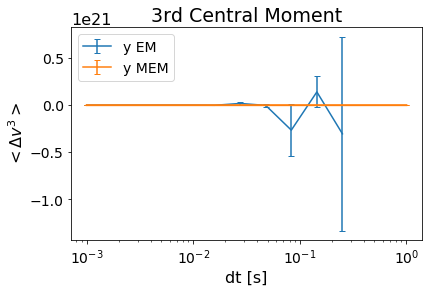

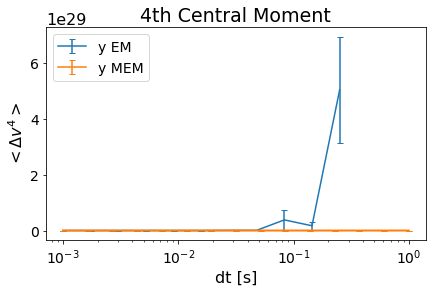

In [40]:

aveMomMEM = np.mean(momListMEM, axis = 1)
steMomMEM = stats.sem(momListMEM, axis = 1)

aveMomEM = np.mean(momListEM, axis = 1)
steMomEM = stats.sem(momListEM, axis = 1)



for momIndex, name in zip(moments, ['1st', '2nd', '3rd', '4th']):
    fig, ax = plt.subplots()
    lines = []
    momIndex = momIndex -1
    for i, lab in zip([1], ['y']):
        ebar = ax.errorbar(dtList, aveMomEM[:, momIndex, i], steMomEM[:, momIndex, i], capsize = 3, label = lab + ' EM')
        ebar = ax.errorbar(dtListMEM, aveMomMEM[:, momIndex, i], steMomMEM[:, momIndex, i], capsize = 3, label = lab + ' MEM')
        lines += ebar.lines
    plt.xscale('log')
#     plt.yscale('log')
#     plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
    power =  str(moments[momIndex])
    if power == '1':
        ylabel = '$<v>$'
        title = 'Mean Velocity'
    elif power == '2':
        ylabel = '$<v^2>$'
        title = 'Variance of Velocity'
        plt.yscale('log')
    else:
        ylabel = '$<\Delta v^{}>$'.format(power)
        title = name +' Central Moment'
    formatAndSave(fig, ax, lines, 'dt [s]', ylabel, fontsize = 16,
                  title = title,
#                  filename = name +'MomentEM.pdf',
                 )

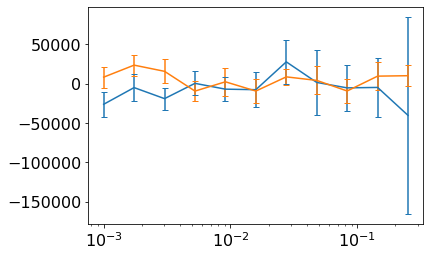

In [29]:
_, ax = plt.subplots()
ax.errorbar(dtList, aveMomEM[:, 0, 1], steMomEM[:, 0, 1], capsize = 3)
ax.errorbar(dtList, aveMomMEM[:, 0, 1], steMomMEM[:, 0, 1], capsize = 3)
plt.xscale('log')
# plt.yscale('log')